## Name: Mohamed Ayman Mohamed 
## ID : 900182267 

### In this notebook, we will explore the data and brings out the insights. I am using EDA approach to analyze the data with a help of various tools and graphical techniques.


![1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.webp](attachment:1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.webp)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/SpotifyFeatures.csv')
#The Link of the dataset: https://www.kaggle.com/adisrw/spotify-data-analysis-using-python/data?select=SpotifyFeatures.csv

# Data Exploration

## 1. Understanding the Data

In [5]:
df.shape

(232725, 18)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [7]:
df['genre'].unique()
# You can notice "Children's Music", 'Children’s Music'
# Put it in the same category

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [8]:
df.replace(to_replace ="Children’s Music", value ="Children's Music", inplace= True)


In [9]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

In [10]:
df.head()

genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 18 columns]

In [11]:
df.isnull().sum() 

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [12]:
df.apply(lambda x: len(x.unique()), axis = 0) #Check the uniquness of each feature 

genre                   26
artist_name          14564
track_name          148615
track_id            176774
popularity             101
acousticness          4734
danceability          1295
duration_ms          70749
energy                2517
instrumentalness      5400
key                     12
liveness              1732
loudness             27923
mode                     2
speechiness           1641
tempo                78512
time_signature           5
valence               1692
dtype: int64

In [13]:
df['artist_name'].value_counts()

Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: artist_name, Length: 14564, dtype: int64

In [14]:
dp = df[df['artist_name'] == 'Giuseppe Verdi']
len(dp['genre'].value_counts())

2

In [15]:
fq = {} 
mx = 0
for artistName in list(df['artist_name'].unique()):
    dp = df[df['artist_name'] == artistName]
    print(artistName,":", len(dp['genre'].value_counts()))
    Len = len(dp['genre'].value_counts())
    mx = max(mx,Len)
    if Len in fq: 
        fq[Len] +=1
    else: 
        fq[Len] = 1

Streaming output truncated to the last 5000 lines.
Roots of Creation : 1
Luciano : 1
Phyllis Dillon : 2
Ken Boothe : 2
Half Pint : 1
Stone Senses : 1
John Brown's Body : 1
Mishka : 1
Aswad : 1
Cas Haley : 1
Iration & Mikey Dread : 1
SkillinJah : 1
Macka B : 1
Bitty McLean : 1
Derrick Harriott : 2
Frankie Paul : 1
Joe Higgs : 1
Chezidek : 1
Tony Rebel : 1
Linton Kwesi Johnson : 1
Fantan Mojah : 1
Quique Neira : 1
Wheeland Brothers : 1
Fiel A La Vega : 1
Brick & Lace : 1
Swiss : 1
Hours Eastly : 1
Kabaka Pyramid : 1
House Of Shem : 1
Dandy Livingstone : 2
The Revolutionaries : 1
Kameleba : 2
Terry Linen : 1
Barefoot Truth : 1
Bim Sherman : 1
77 Jefferson : 1
Cocoa Tea : 1
Lucky Dube : 1
Mamita Peyote : 1
The Melodians : 2
The Supervillains : 2
Alific : 1
Juan Pablo Vega : 1
Kiko Bun : 2
Bob Andy : 1
Romain Virgo : 1
Hollie Cook : 1
Lady Saw : 1
Ernest Ranglin : 1
Prince Jammy : 1
Jonny Clarke : 1
Movimiento Original : 1
Etana : 1
Barry Brown : 1
Part One Tribe : 1
Arise Roots : 1
Pato Ba

In [16]:
fq

{1: 9566, 2: 2615, 3: 1230, 4: 712, 5: 290, 6: 102, 7: 45, 8: 4}

In [17]:
bool_series = df.duplicated()

In [18]:
bool_series.sum() #All examples are unique

0

In [19]:
df.describe().T

count           mean  ...          75%          max
popularity        232725.0      41.127502  ...      55.0000      100.000
acousticness      232725.0       0.368560  ...       0.7220        0.996
danceability      232725.0       0.554364  ...       0.6920        0.989
duration_ms       232725.0  235122.339306  ...  265768.0000  5552917.000
energy            232725.0       0.570958  ...       0.7870        0.999
instrumentalness  232725.0       0.148301  ...       0.0358        0.999
liveness          232725.0       0.215009  ...       0.2640        1.000
loudness          232725.0      -9.569885  ...      -5.5010        3.744
speechiness       232725.0       0.120765  ...       0.1050        0.967
tempo             232725.0     117.666585  ...     139.0540      242.903
valence           232725.0       0.454917  ...       0.6600        1.000

[11 rows x 8 columns]

In [20]:
genres = df['genre'].unique()

In [21]:
#Check the balance of the data 
genreFrequency = {}

for genre in genres: 
    genreFrequency[genre] = len(df[df['genre'] == genre])


In [22]:
genreFrequency

{'A Capella': 119,
 'Alternative': 9263,
 'Anime': 8936,
 'Blues': 9023,
 "Children's Music": 14756,
 'Classical': 9256,
 'Comedy': 9681,
 'Country': 8664,
 'Dance': 8701,
 'Electronic': 9377,
 'Folk': 9299,
 'Hip-Hop': 9295,
 'Indie': 9543,
 'Jazz': 9441,
 'Movie': 7806,
 'Opera': 8280,
 'Pop': 9386,
 'R&B': 8992,
 'Rap': 9232,
 'Reggae': 8771,
 'Reggaeton': 8927,
 'Rock': 9272,
 'Ska': 8874,
 'Soul': 9089,
 'Soundtrack': 9646,
 'World': 9096}

## Before visualize the data, we need to deal with categorical data
#### 1.We can notice that from above (genre, artist_name, track_name, track_id, key, and major) are catagorical features. 
#### Genre (The Ground Truth): can be considered for each genre as a unique id, as we will not put it in a model for prediction. 
#### 2.artist_name feature is quite problematic, as it includes important value for the data, as most of the arists tend to release one genre songs (9566 artists). However, we need to take into consideration the number of songs that each artist releases. We have two options to convert this feature string to numerical representations. Text Embedding is the best option to be able to take semantics into consideration. Another option is using one Hot Encoding. However, we will need to have a powerful PC to pre-process such a thing. We cannot represent it as unique IDs, as unique IDs will noise the data more (we need to have it in higher dimensions). For sake of simplicity, I will drop it.
#### 3.artist_id is not necessery at all for the data
#### 4.track_name has some important words related more to genre, but here we have to use some NLP (TFIDF or Embedding) to take these semantics into consideration for better prediction. For sake of simplicity, I will drop it.
#### 5.key will be converted to one hot encoding
#### 6. Major is also considered as a categorical feature

#### To be able to visualize the data itself, I will give Major and key unique IDs. Then, it will be converted to one hot encoding in data wrangling and feature engineering section

In [23]:
#Convert the Ground Truth To Numbers 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['ground_truth'] = labelencoder.fit_transform(df['genre'])

In [24]:
df['key'].unique()

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

In [25]:
# df = pd.concat([df,key_one_hot_encoding,mode_one_hot_encoding],axis = 1)

## 2.Data Visualization


### 2.1 Visualize the Ground Truth with their frequencies to see whether the data is balanced or not for further training.

Text(0, 0.5, 'Frequency')

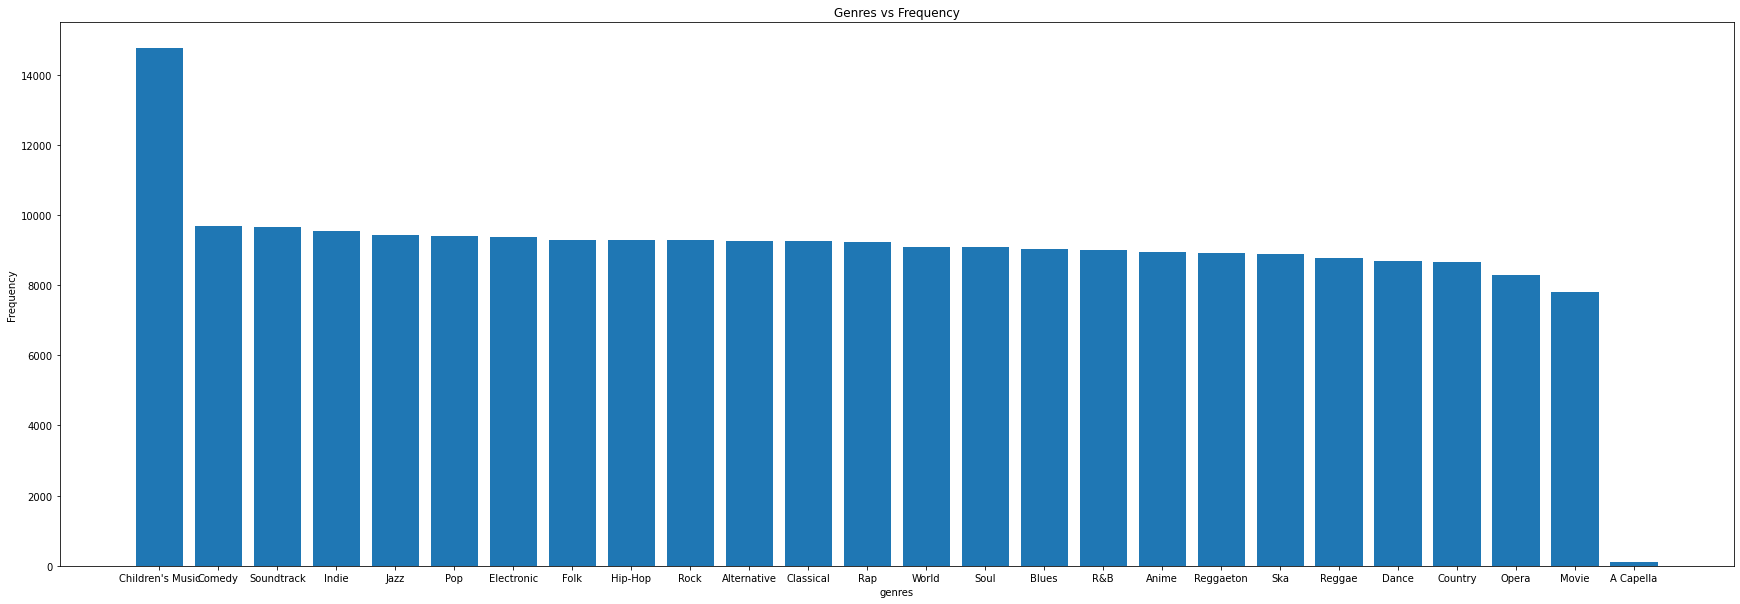

In [26]:
fig, ax = plt.subplots(figsize=(30,10)) 
# count the occurrence of each class 
data = df['genre'].value_counts() 
# get x and y data 
genre = data.index 
frequency = data.values 
# create bar chart 
ax.bar(genre, frequency) 
# set title and labels 
ax.set_title('Genres vs Frequency') 
ax.set_xlabel('genres') 
ax.set_ylabel('Frequency')

In [27]:
data

Children's Music    14756
Comedy               9681
Soundtrack           9646
Indie                9543
Jazz                 9441
Pop                  9386
Electronic           9377
Folk                 9299
Hip-Hop              9295
Rock                 9272
Alternative          9263
Classical            9256
Rap                  9232
World                9096
Soul                 9089
Blues                9023
R&B                  8992
Anime                8936
Reggaeton            8927
Ska                  8874
Reggae               8771
Dance                8701
Country              8664
Opera                8280
Movie                7806
A Capella             119
Name: genre, dtype: int64

In [28]:
genres = df['genre'].unique()
data = []
for genre in genres: 
    data.append(len(df[df['genre']== genre]))


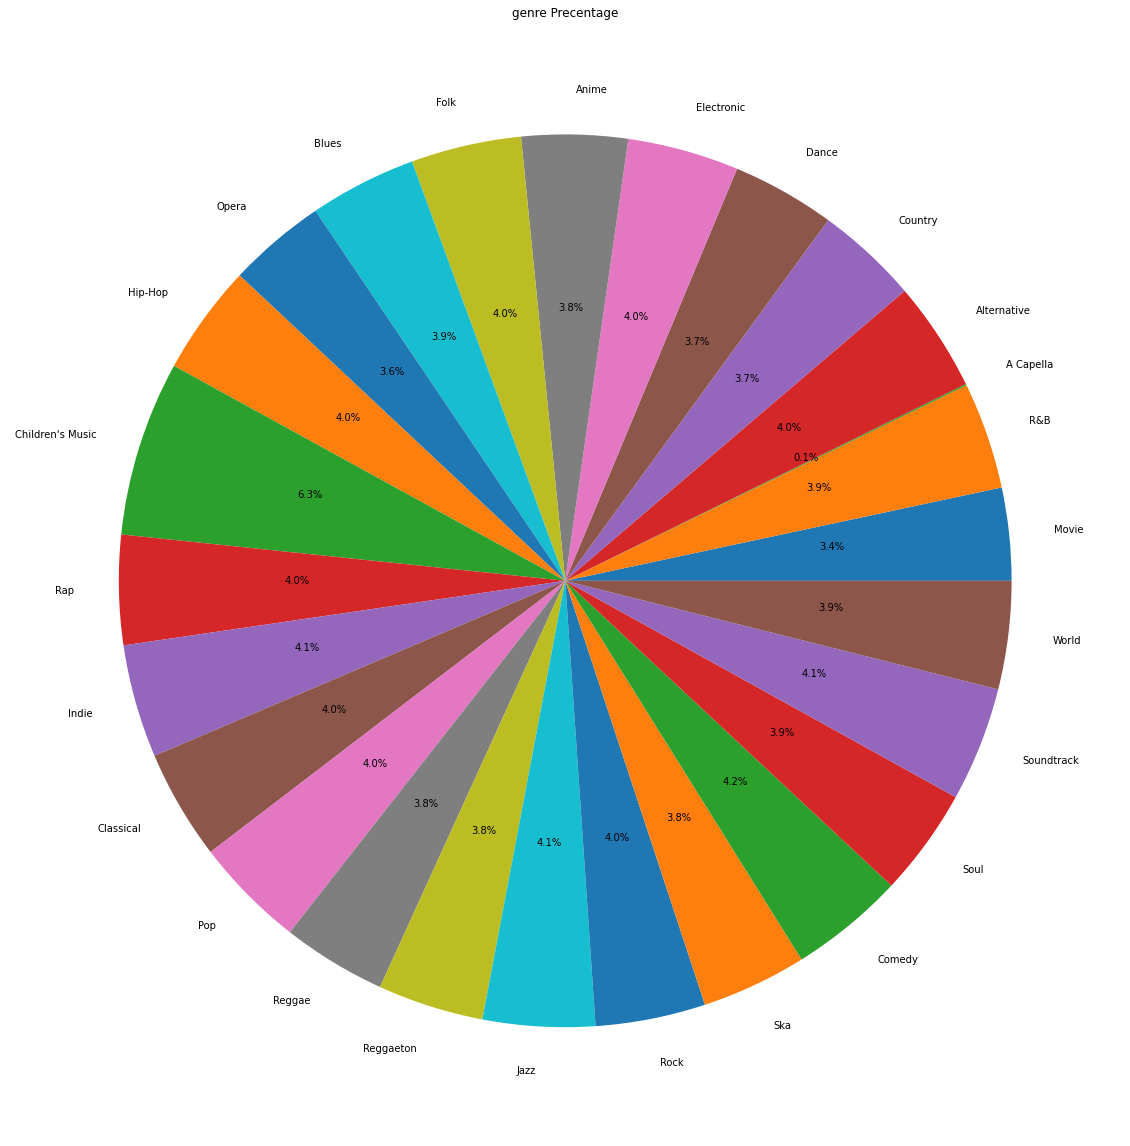

In [29]:

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = ((pct / 100.0)*np.sum(allvalues, axis = 0))
#     print(pct, " ", absolute)
    return "{:.1f}%\n".format(pct, absolute)

# Creating plot
fig = plt.figure(figsize =(20, 50))
plt.title('genre Precentage')

plt.pie(data, labels = genres, autopct=lambda pct: func(pct,data))
        
# show plot
plt.show()

### 2.2 Visualize each Feature using skewness and Kurtosis:
https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.

### Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.
![1_Gqd6Ioie0sa_Hryb3grsFQ.png](attachment:1_Gqd6Ioie0sa_Hryb3grsFQ.png)

### Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution (4th moment in the moment-based calculation). That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.
![800px-Standard_symmetric_pdfs.svg.png](attachment:800px-Standard_symmetric_pdfs.svg.png)


In [30]:
from scipy.stats import skew

In [31]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


popularity         -0.336390
acousticness        0.534242
danceability       -0.378278
duration_ms         9.893376
energy             -0.400223
instrumentalness    1.819766
liveness            2.074093
loudness           -1.662208
speechiness         3.311269
tempo               0.403350
valence             0.144131
ground_truth        0.052528
dtype: float64

In [32]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


popularity           -0.401519
acousticness         -1.285090
danceability         -0.366137
duration_ms         250.742541
energy               -0.813595
instrumentalness      1.588179
liveness              3.887973
loudness              3.207467
speechiness          10.984760
tempo                -0.466878
valence              -1.013575
ground_truth         -1.239272
dtype: float64

In [33]:
df['ground_truth'].unique()

array([14, 17,  0,  1,  7,  8,  9,  2, 10,  3, 15, 11,  4, 18, 12,  5, 16,
       19, 20, 13, 21, 22,  6, 23, 24, 25])

In [34]:
df_temp = df.copy()


In [35]:
df_temp['key_'] = labelencoder.fit_transform(df_temp['key'])
df_temp['mode_'] = labelencoder.fit_transform(df_temp['mode'])
df_temp['time_signature_'] = labelencoder.fit_transform(df_temp['time_signature'])
df_temp.drop('genre', inplace=True, axis=1)
df_temp.drop('key', inplace=True, axis=1)
df_temp.drop('mode', inplace=True, axis=1)


In [36]:
df_temp.drop('track_name', inplace=True, axis=1)
df_temp.drop('track_id', inplace=True, axis=1)
df_temp.drop('artist_name', inplace=True, axis=1)

df_temp.drop('time_signature', inplace=True, axis=1)


In [37]:
df_temp.head() #all of them numbers 

popularity  acousticness  danceability  ...  key_  mode_  time_signature_
0           0         0.611         0.389  ...     4      0                3
1           1         0.246         0.590  ...     9      1                3
2           3         0.952         0.663  ...     3      1                4
3           0         0.703         0.240  ...     4      0                3
4           4         0.950         0.331  ...     8      0                3

[5 rows x 15 columns]

0   0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0   1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0   2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1   0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1   1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1   2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2   0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2   1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2   2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3   0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3   1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3   2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


4   0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


4   1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


4   2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


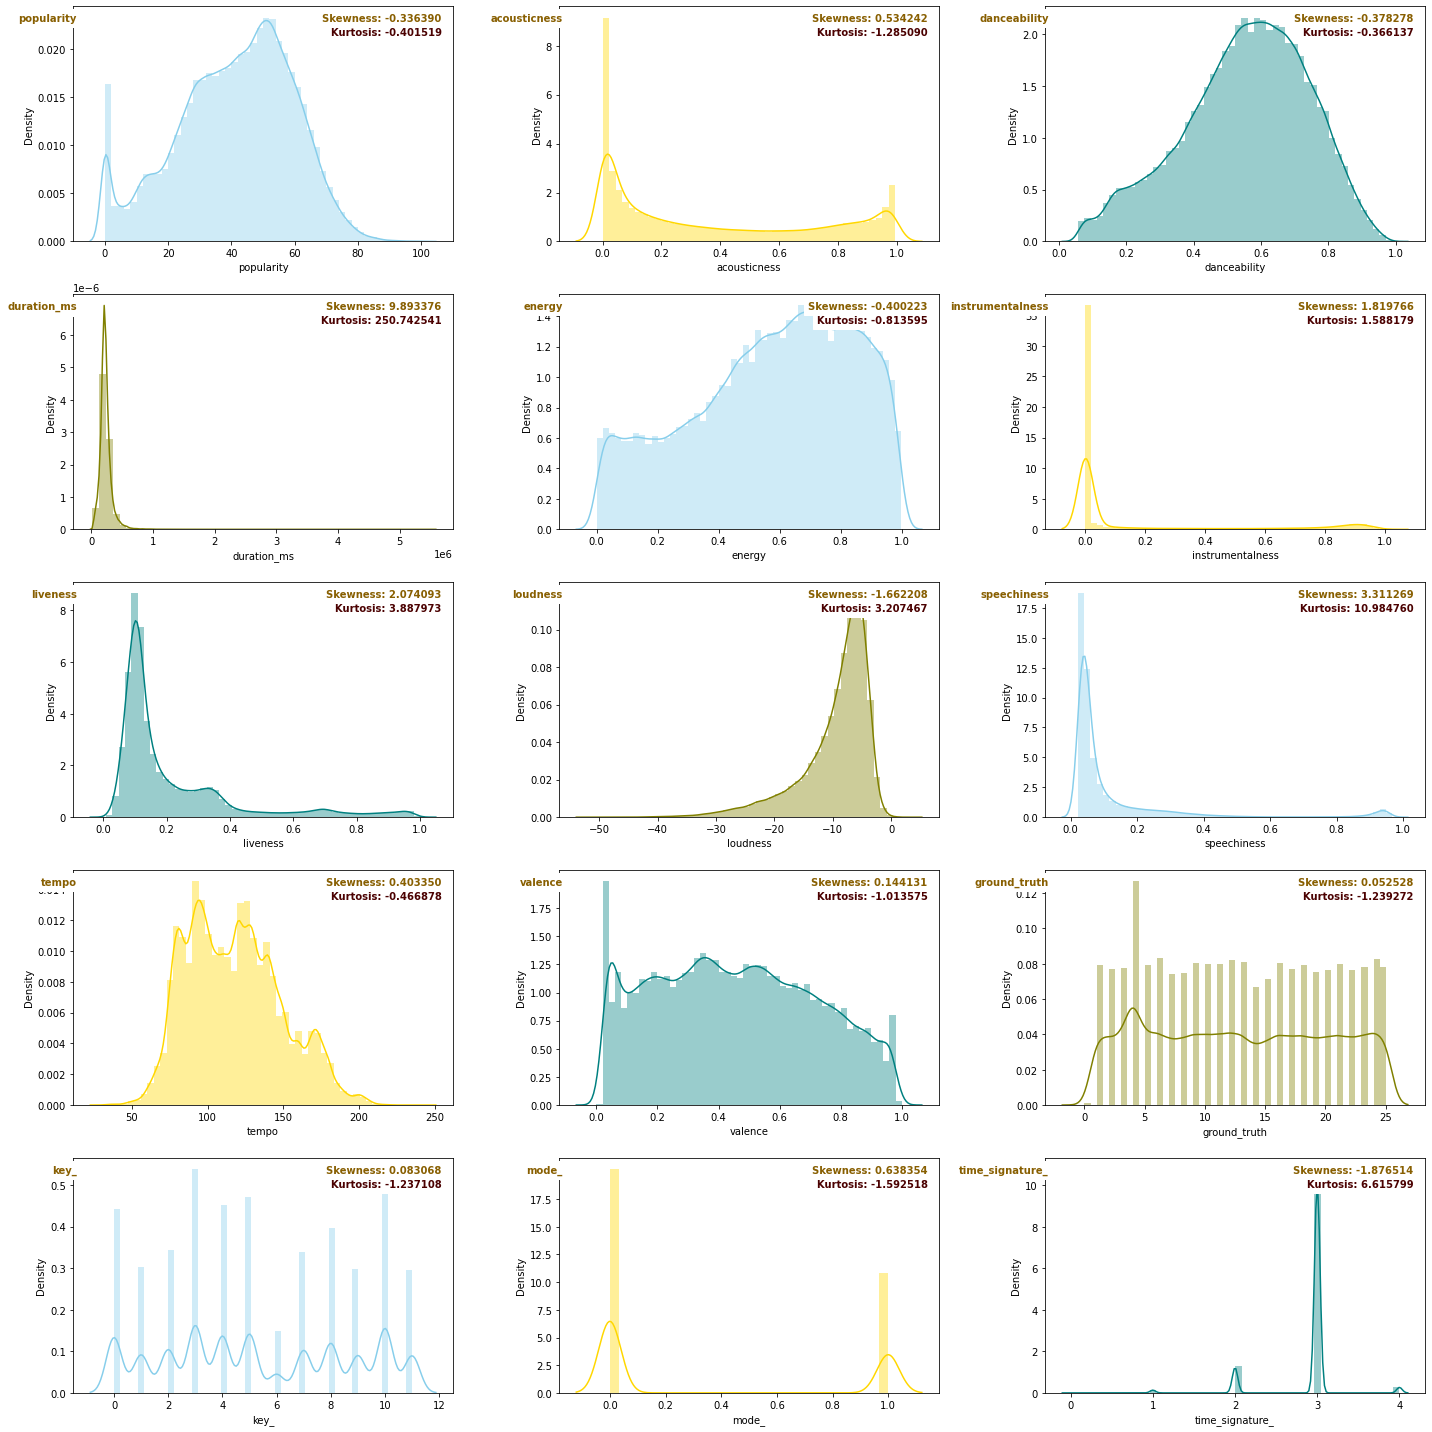

In [38]:
colors = ["skyblue","gold","teal","olive"]
namesOfFeatures = df_temp.columns

colorIdx = 0
f, axes = plt.subplots(5,3,figsize=(20, 20))
i = 0
j = 0
take = 0
for feature in namesOfFeatures:
    print(i," ", j)
    sns.distplot(df_temp[feature], color=colors[colorIdx%4], ax=axes[i,j])
    if j >= 2: 
        i+=1
        j=0
    else: 
        j+=1
    colorIdx+=1
    
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df_temp.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df_temp.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
    ax.text(x=0.01, y=0.97, transform=ax.transAxes, s=namesOfFeatures[i],\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    
plt.tight_layout()

### 2.3 Visualize THe BoxPlot with each feature in Univariate and Multivariate analyses to help us detect the Outliers


#### 2.3.1 Uni-variate(one variable outlier analysis) Outliers:

In [39]:
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popularity             26.0000
acousticness            0.6844
danceability            0.2570
duration_ms         82911.0000
energy                  0.4020
instrumentalness        0.0358
liveness                0.1666
loudness                6.2700
speechiness             0.0683
tempo                  46.0950
valence                 0.4230
ground_truth           13.0000
key_                    5.0000
mode_                   1.0000
time_signature_         0.0000
dtype: float64


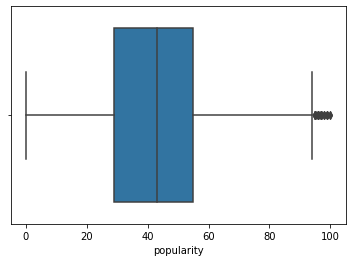

In [40]:
#Visualize the Outliers using BoxPlots
sns.boxplot(x=df_temp['popularity'])

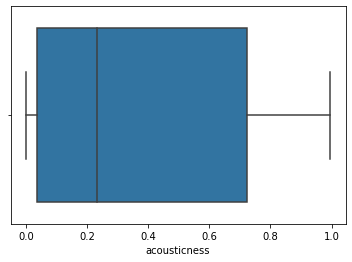

In [41]:
sns.boxplot(x=df_temp['acousticness'])

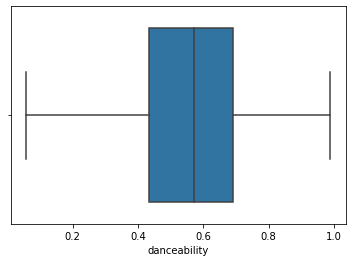

In [42]:
sns.boxplot(x=df_temp['danceability'])

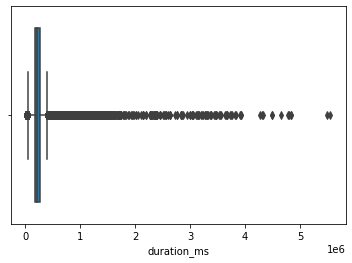

In [43]:
sns.boxplot(x=df_temp['duration_ms'])

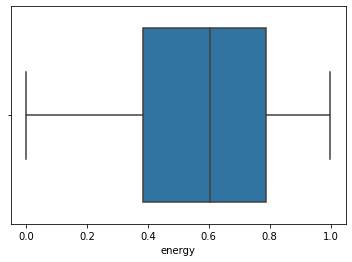

In [44]:
sns.boxplot(x=df_temp['energy'])

(array([182044.,   5437.,   3368.,   2873.,   2664.,   2819.,   3559.,
          5219.,  12671.,  12071.]),
 array([0.    , 0.0999, 0.1998, 0.2997, 0.3996, 0.4995, 0.5994, 0.6993,
        0.7992, 0.8991, 0.999 ]),
 <a list of 10 Patch objects>)

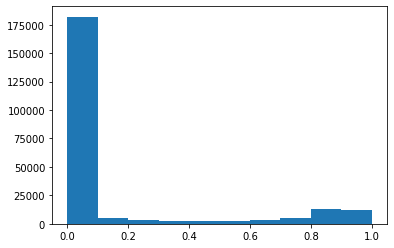

In [45]:
plt.hist(df_temp['instrumentalness'])

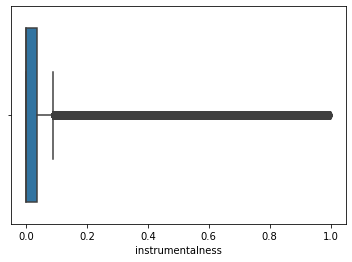

In [46]:
sns.boxplot(x=df_temp['instrumentalness'])

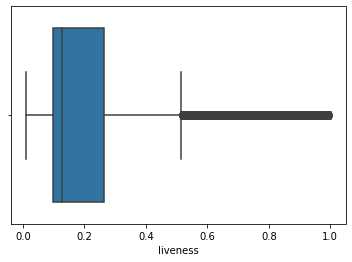

In [47]:
sns.boxplot(x=df_temp['liveness'])

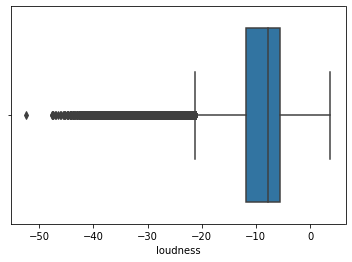

In [48]:
sns.boxplot(x=df_temp['loudness'])

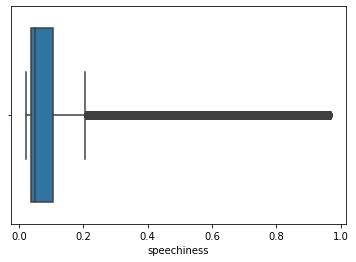

In [49]:
sns.boxplot(x=df_temp['speechiness'])

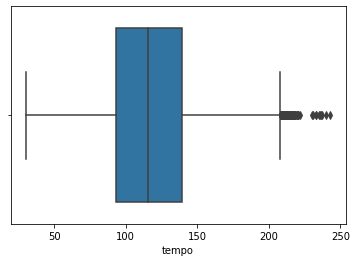

In [50]:
sns.boxplot(x=df_temp['tempo'])

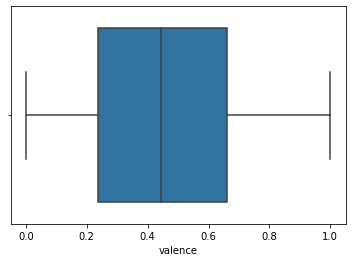

In [51]:
sns.boxplot(x=df_temp['valence'])

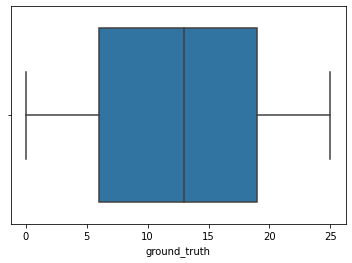

In [52]:
sns.boxplot(x=df_temp['ground_truth'])

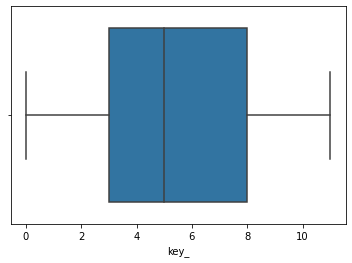

In [53]:
sns.boxplot(x=df_temp['key_'])

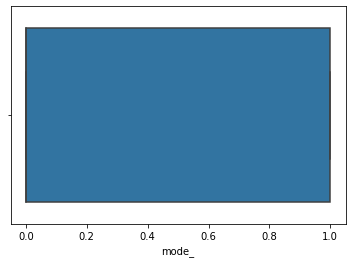

In [54]:
sns.boxplot(x=df_temp['mode_'])

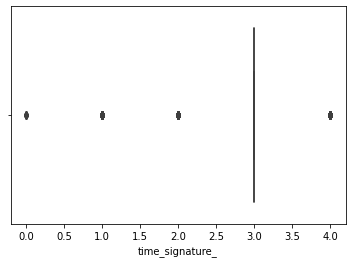

In [55]:
sns.boxplot(x=df_temp['time_signature_'])

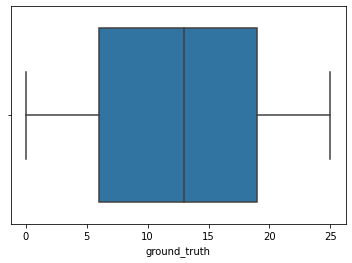

In [56]:
sns.boxplot(x=df_temp['ground_truth'])

In [57]:
namesOfFeatures

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'ground_truth', 'key_', 'mode_', 'time_signature_'],
      dtype='object')

#### 2.3.2 Multi-variate(More Than one Variable outlier analysis) Outliers:

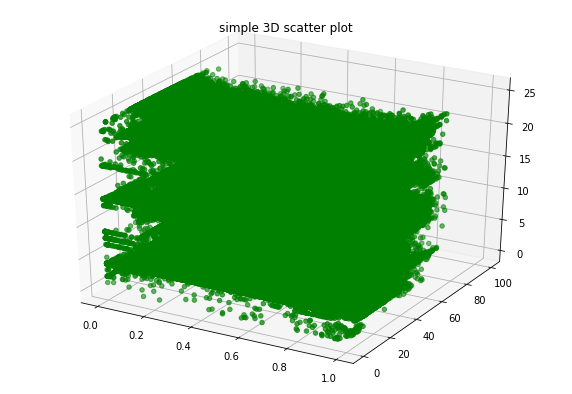

In [58]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_temp['acousticness'], df_temp['popularity'], df_temp['ground_truth'], color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

### 2.4 BiVariate Data Analysis 
![1_bB56fmAsXp9FKcfCsv9P1g.png](attachment:1_bB56fmAsXp9FKcfCsv9P1g.png)


#### 2.4.1 Using Heatmaps Representing Correlations

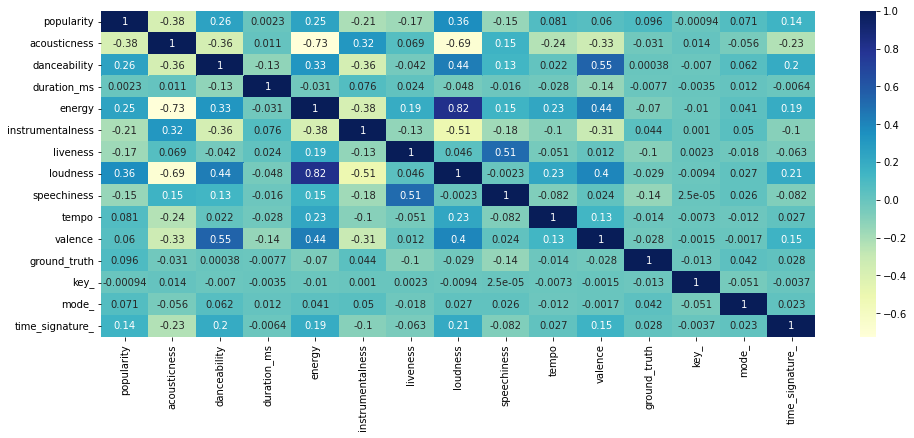

In [59]:
plt.figure(figsize=(16, 6))

dataplot = sns.heatmap(df_temp.corr(), cmap="YlGnBu", annot=True)
plt.show()

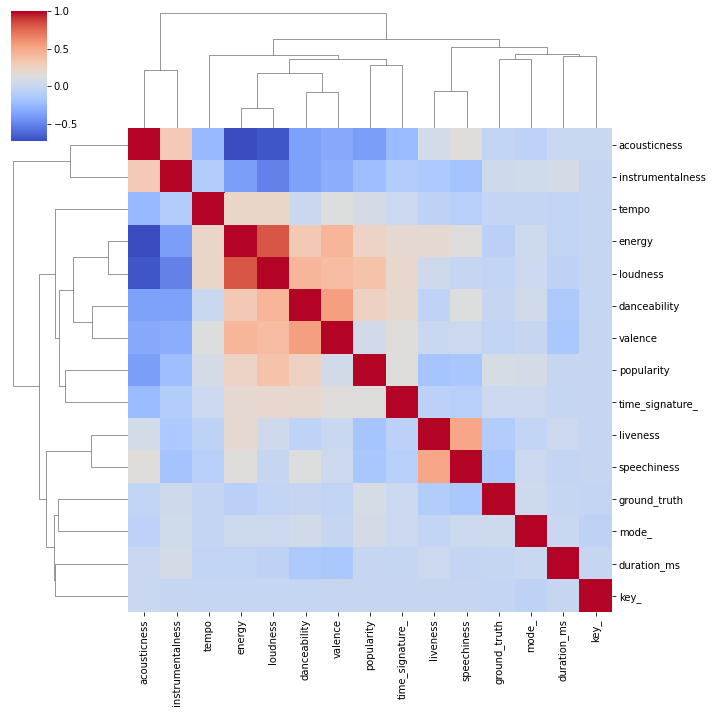

In [60]:
sns.clustermap(df_temp.corr(),cmap="coolwarm")

#### 3.3 Checking the correlations between continous features

<Figure size 1152x576 with 0 Axes>

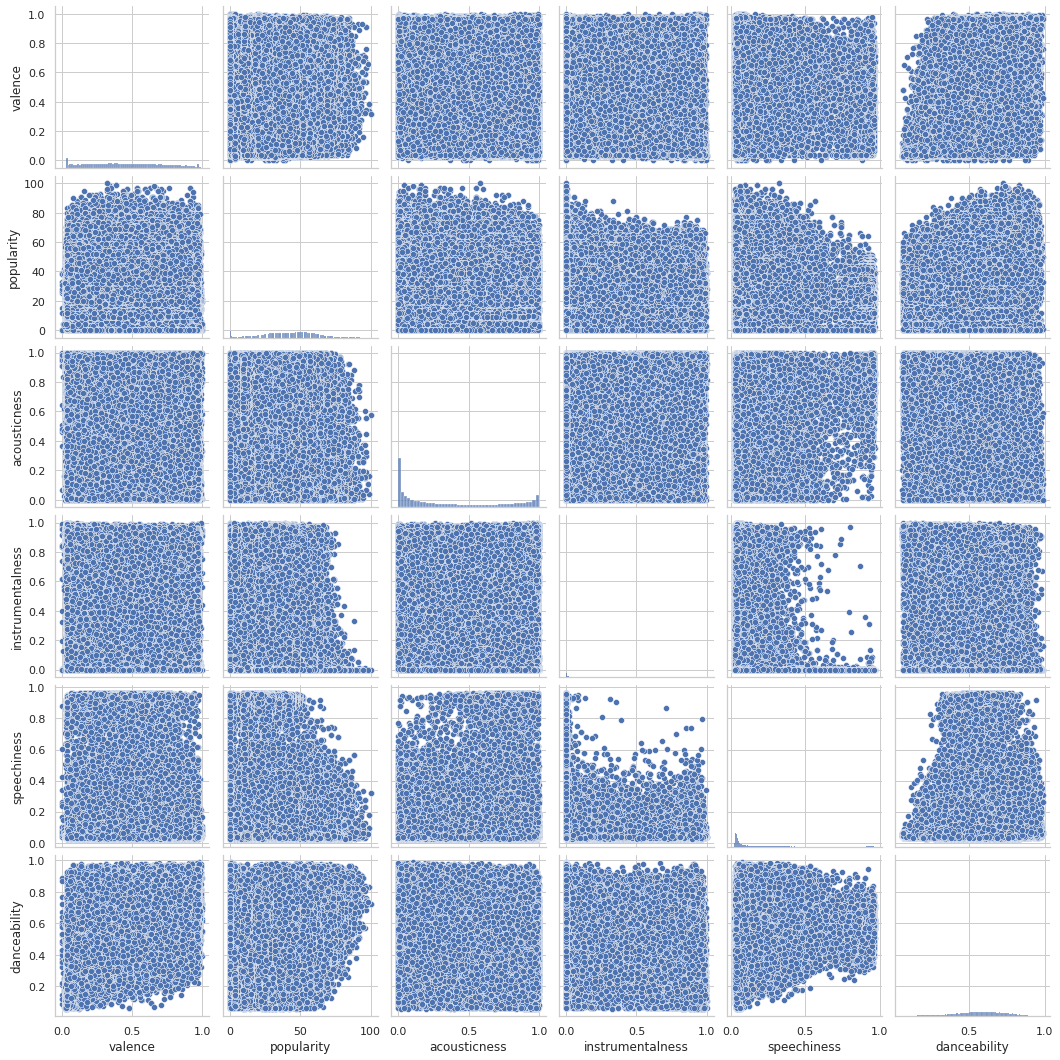

In [61]:
# Popularity of Genres with respect to the various features
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df_temp[cols], height = 2.5 )
plt.show();

In [62]:
import plotly.express as px #Interactive Plots
import statsmodels.api as sm

main_df = df_temp.copy()
def plot_corr(feature_1,feature_2,title):
    corr_df = main_df[[feature_1,feature_2]]
    corr_df["feature_1_interval"] = pd.cut(main_df[feature_1],np.arange(0,1,0.0001),labels=[f"{feature_1}_{i}" for i in range(1,10000)])
    corr_df = corr_df.groupby("feature_1_interval").median()
    plot = px.scatter(corr_df,x=feature_1, y=feature_2,trendline="ols",trendline_color_override="red")
    plot.update_traces(marker=dict(size=5,color='rgba(30, 215, 96, .9)',
                                  line=dict(width=1)),
                      selector=dict(mode='markers'))
    plot.update_layout(title_text=title)

    plot.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [63]:
plot_corr("acousticness","popularity","Popularity vs Acousticness")
plot_corr("acousticness","instrumentalness","instrumentalness vs Acousticness")
plot_corr("acousticness","danceability","danceability vs Acousticness")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
plot_corr("speechiness","danceability","danceability vs speechiness")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
plot_corr("instrumentalness","popularity","instrumentalness vs popularity")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
plot_corr("energy","danceability","energy vs danceability")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
plot_corr("energy","valence","energy vs valence")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 3.4 Comparing between 3 categorical Features with respect to the Genre 

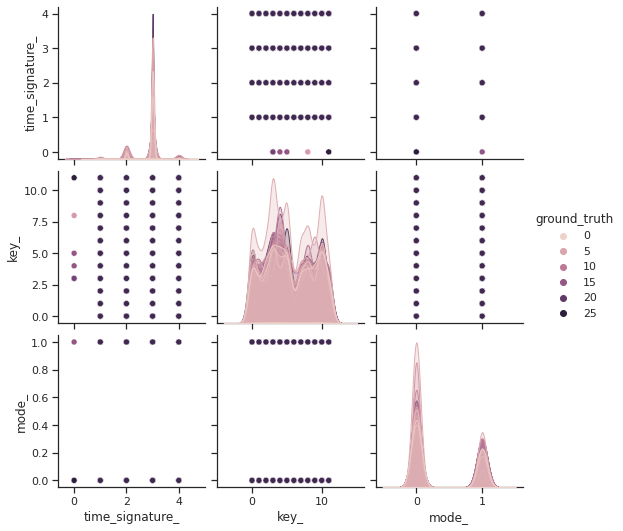

In [68]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_temp,vars = [ 'time_signature_','key_', 'mode_'],
hue="ground_truth")
plt.show()

In [69]:
data = (df
        .groupby(['genre', 'mode'])['mode']
        .count()
        .unstack(1))

data.style.background_gradient(cmap=plt.cm.coolwarm_r)

In [70]:
data = (df
        .groupby(['genre', 'key'])['key']
        .count()
        .unstack(1))

data.style.background_gradient(cmap=plt.cm.coolwarm_r)

In [71]:
data = (df
        .groupby(['genre', 'time_signature'])['time_signature']
        .count()
        .unstack(1))

data.style.background_gradient(cmap=plt.cm.coolwarm_r)

#### Checking if two categorical variables are independent can be done with Chi-Squared test of independence.
#### Chi-Square test of independence is most commonly used to test association between two categorical variables. The output gives us p-value, degrees of freedom and expected values.

#### The Steps for using Chi-Square Test:Setting Hypothesis, Prepare Contingency Table, Getting Expected Value Count, Comparing Observed Value with Expected Value and concluding the Hypothesis


In [72]:
###https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7
# import scipy.stats as ss
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
# cramers_v(df['genre'],df['mode'])

In [73]:
categorical_col = ['mode','key']
chisqt = pd.crosstab(df['ground_truth'], df['key'], margins=True)
print(chisqt)


key               A     A#      B      C  ...     F#      G     G#     All
ground_truth                              ...                             
0                 9     10     10     15  ...      4     15     10     119
1               865    510    844   1045  ...    727   1024    622    9263
2               868    537    658   1041  ...    607   1037    590    8936
3              1233    458    610   1175  ...    365   1311    425    9023
4              1400    871   1056   2044  ...    866   1838    857   14756
5               853    664    440   1112  ...    443   1138    470    9256
6               823    813    647    558  ...   1238    676    564    9681
7               927    464    598    946  ...    560   1207    499    8664
8               740    537    747   1111  ...    695    922    683    8701
9               842    706    893    861  ...    714   1035    591    9377
10             1057    450    716   1361  ...    491   1140    440    9299
11              692    76

In [74]:
from scipy.stats import chi2_contingency 
print('                          ','pValue ', 'Statistical Value ', 'The Degree of Freedom')

chisqt = pd.crosstab(df['key'], df['mode'], margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                      chisqt.iloc[1][0:5].values])
print("The Feature ",'mode Vs Key' , ":",chi2_contingency(value)[0:3])
chisqt = pd.crosstab(df['ground_truth'], df['mode'], margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                      chisqt.iloc[1][0:5].values])
print("The Feature ",'mode Vs ground_truth' , ":",chi2_contingency(value)[0:3])
chisqt = pd.crosstab(df['ground_truth'], df['key'], margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                      chisqt.iloc[1][0:5].values])
print("The Feature ",'key Vs ground_truth' , ":",chi2_contingency(value)[0:3])

                           pValue  Statistical Value  The Degree of Freedom
The Feature  mode Vs Key : (314.89525025109185, 4.1818188816559564e-69, 2)
The Feature  mode Vs ground_truth : (4.737324310340748, 0.09360587267894607, 2)
The Feature  key Vs ground_truth : (4.094750779683934, 0.3933345733502945, 4)


### We know that if Pvalue >0.05, the two features are independent. (Accepting Null Hypothesis)

### Popularity vs artist Name

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

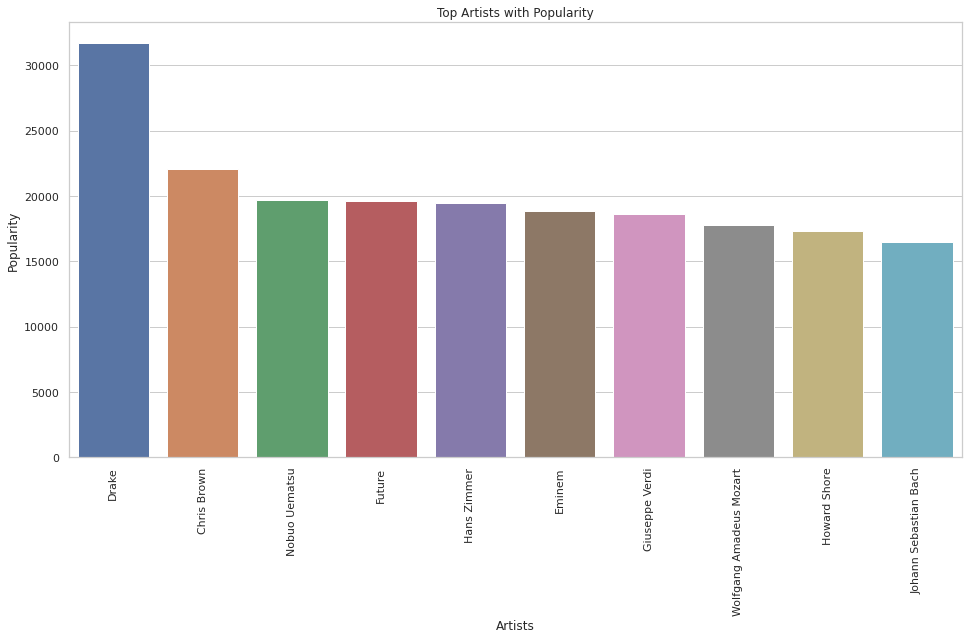

In [75]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artist_name")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

### From Visualizing the Data, we can notice that 
#### 1. There is no correlation between temp and other features
#### 2. The correlation between categorical features are nearly 0, as p_value for all of them > 0.05, meaning that they are independent 
#### 3. There are some strong correlations between continous features as we can see from the graphs drawn above.
#### 4. We can notice there are a number of outliers needed to be deleted to avoid noise during the training Step (see the kurtosis and IQR)
#### 5. We can notice that Last Genre "A Capella" has 119 in the data. It means that the data is somehow imbalanced. There are multiple basic solutions to solve it, such as oversampling and undersampling. However, this will lead to other problems. I need to do through research to see better solutions other than deleting the examples.
### We can conclude that 
#### 1. Temp, artist_id, track_name, and artist_name should be dropped as explained above
#### 2. Remove all Outliers in the input features 
#### 3. We will need to rescale the data features
#### 4. Converting the categorical features to one hot encoding 

# Data Wrangling and Feature Engineering

In [76]:
df

genre               artist_name  ... valence ground_truth
0       Movie            Henri Salvador  ...   0.814           14
1       Movie         Martin & les fées  ...   0.816           14
2       Movie           Joseph Williams  ...   0.368           14
3       Movie            Henri Salvador  ...   0.227           14
4       Movie              Fabien Nataf  ...   0.390           14
...       ...                       ...  ...     ...          ...
232720   Soul                     Slave  ...   0.962           23
232721   Soul  Jr Thomas & The Volcanos  ...   0.969           23
232722   Soul              Muddy Waters  ...   0.813           23
232723   Soul                   R.LUM.R  ...   0.489           23
232724   Soul            Mint Condition  ...   0.479           23

[232725 rows x 19 columns]

### 3.1 Dropping unnecessary features

In [77]:
df.drop('track_name', inplace=True, axis=1)
df.drop('track_id', inplace=True, axis=1)
df.drop('artist_name', inplace=True, axis=1)

In [78]:
df.drop('tempo', inplace=True, axis=1)


### 3.2 Handling the problem of Outliers

In [79]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popularity             26.0000
acousticness            0.6844
danceability            0.2570
duration_ms         82911.0000
energy                  0.4020
instrumentalness        0.0358
liveness                0.1666
loudness                6.2700
speechiness             0.0683
valence                 0.4230
ground_truth           13.0000
dtype: float64


### Outliers lead to many problems "sensitivity to the noise". Now, we can solve the problem using different techniques. If we delete all outliers, the majority of the data will be deleted. If we leave the outliers, problems will occur. 
### Through research, I have found that the features whose interval between [0,1] have come from APIs, so it does not mean that they are outliers. However, duration_ms is pointy (according to kurtosis), so we will remove the outliers with duration_ms only

In [80]:
df_t = df

In [81]:
df_t['duration_ms'] = df_t['duration_ms'][~((df_t['duration_ms'] < (Q1['duration_ms'] - 1.5 * IQR['duration_ms'])) |(df_t['duration_ms'] > (Q3['duration_ms'] + 1.5 * IQR['duration_ms'])))]

In [82]:
df = df.dropna(axis = 0)

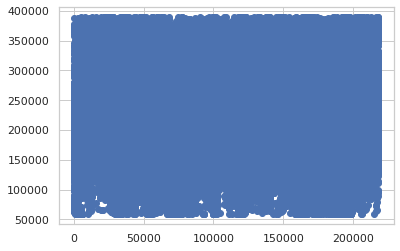

In [83]:
plt.scatter(range(len(df['duration_ms'])), df['duration_ms'])

In [84]:
dff = df.copy()

In [85]:
df

genre  popularity  acousticness  ...  time_signature  valence  ground_truth
0       Movie           0       0.61100  ...             4/4    0.814            14
1       Movie           1       0.24600  ...             4/4    0.816            14
2       Movie           3       0.95200  ...             5/4    0.368            14
3       Movie           0       0.70300  ...             4/4    0.227            14
4       Movie           4       0.95000  ...             4/4    0.390            14
...       ...         ...           ...  ...             ...      ...           ...
232720   Soul          39       0.00384  ...             4/4    0.962            23
232721   Soul          38       0.03290  ...             4/4    0.969            23
232722   Soul          47       0.90100  ...             4/4    0.813            23
232723   Soul          44       0.26200  ...             4/4    0.489            23
232724   Soul          35       0.09730  ...             4/4    0.479            23

[218074 rows x 15 columns]

### 3.3 Seperate the label (ground Truth from the features and give to each label a unique id)

In [86]:
Y = df['genre'].copy()
df.drop('genre', inplace=True, axis=1)
df.drop('ground_truth', inplace=True, axis=1)
Y_label = labelencoder.fit_transform(Y)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(218074, 13)

In [87]:
Y_label

array([14, 14, 14, ..., 23, 23, 23])

### 3.4 Converting all categorical features to one hot encoding

In [88]:
key_one_hot_encoding= pd.get_dummies(df['key']) #One Hot Encoding to the Key
mode_one_hot_encoding= pd.get_dummies(df['mode']) #One Hot Encoding to the Mode
time_one_hot_encoding= pd.get_dummies(df['time_signature']) 

In [89]:
df.drop('key', inplace=True, axis=1)
df.drop('mode', inplace=True, axis=1)
df.drop('time_signature', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
df = pd.concat([df,key_one_hot_encoding,mode_one_hot_encoding,time_one_hot_encoding],axis = 1)
df.head()

popularity  acousticness  danceability  duration_ms  ...  1/4  3/4  4/4  5/4
0           0         0.611         0.389      99373.0  ...    0    0    1    0
1           1         0.246         0.590     137373.0  ...    0    0    1    0
2           3         0.952         0.663     170267.0  ...    0    0    0    1
3           0         0.703         0.240     152427.0  ...    0    0    1    0
4           4         0.950         0.331      82625.0  ...    0    0    1    0

[5 rows x 29 columns]

### 3.5 Handling negative Numbers 

In [91]:
# Loudness -52.45700	
mnValue = df['loudness'].min()
mnValue 

-52.457

In [92]:
alpha = -1*mnValue + 1

In [93]:
loudnessFeature = np.log(df['loudness']+alpha)

In [94]:
df.drop('loudness', inplace=True, axis=1)
df['loudness'] = loudnessFeature

In [95]:
df.head()

popularity  acousticness  danceability  duration_ms  ...  3/4  4/4  5/4  loudness
0           0         0.611         0.389      99373.0  ...    0    1    0  3.944084
1           1         0.246         0.590     137373.0  ...    0    1    0  3.869074
2           3         0.952         0.663     170267.0  ...    0    0    1  3.678273
3           0         0.703         0.240     152427.0  ...    0    1    0  3.720354
4           4         0.950         0.331      82625.0  ...    0    1    0  3.475284

[5 rows x 29 columns]

### 3.5 Scaling and Normalization

In [96]:
df['duration_ms'].isnull().sum()

0

In [97]:
df['duration_m'] = df['duration_ms'].apply(lambda x:round(x/(1000*60)))
df.drop('duration_ms',axis=1,inplace=True)

In [98]:
df.describe().T

count       mean  ...        75%         max
popularity        218074.0  41.834538  ...  55.000000  100.000000
acousticness      218074.0   0.354056  ...   0.686000    0.996000
danceability      218074.0   0.562291  ...   0.696000    0.989000
energy            218074.0   0.580657  ...   0.792000    0.999000
instrumentalness  218074.0   0.134892  ...   0.020200    0.998000
liveness          218074.0   0.211084  ...   0.260000    1.000000
speechiness       218074.0   0.117523  ...   0.106000    0.967000
valence           218074.0   0.463917  ...   0.667000    1.000000
A                 218074.0   0.097348  ...   0.000000    1.000000
A#                218074.0   0.066326  ...   0.000000    1.000000
B                 218074.0   0.076378  ...   0.000000    1.000000
C                 218074.0   0.118079  ...   0.000000    1.000000
C#                218074.0   0.100814  ...   0.000000    1.000000
D                 218074.0   0.102878  ...   0.000000    1.000000
D#                218074.0   0.032085  ...   0.000000    1.000000
E                 218074.0   0.074314  ...   0.000000    1.000000
F                 218074.0   0.086319  ...   0.000000    1.000000
F#                218074.0   0.065881  ...   0.000000    1.000000
G                 218074.0   0.113466  ...   0.000000    1.000000
G#                218074.0   0.066111  ...   0.000000    1.000000
Major             218074.0   0.651123  ...   1.000000    1.000000
Minor             218074.0   0.348877  ...   1.000000    1.000000
0/4               218074.0   0.000032  ...   0.000000    1.000000
1/4               218074.0   0.010519  ...   0.000000    1.000000
3/4               218074.0   0.097870  ...   0.000000    1.000000
4/4               218074.0   0.869939  ...   1.000000    1.000000
5/4               218074.0   0.021639  ...   0.000000    1.000000
loudness          218074.0   3.777774  ...   3.872242    4.046571
duration_m        218074.0   3.657602  ...   4.000000    7.000000

[29 rows x 8 columns]

In [99]:
print("(",df['duration_m'].max(),", ",df['duration_m'].min(),")")

( 7 ,  1 )


In [100]:
data = np.array(df['popularity'])

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
popularityScaled = scaler.fit_transform(data.reshape(-1,1))
popularityScaled

array([[0.  ],
       [0.01],
       [0.03],
       ...,
       [0.47],
       [0.44],
       [0.35]])

In [102]:
durationScaled = scaler.fit_transform(np.array(df['duration_m']).reshape(-1,1))
df.drop('duration_m',axis=1,inplace=True)
df['duration_m'] = durationScaled

In [103]:
df

popularity  acousticness  danceability  ...  5/4  loudness  duration_m
0                0       0.61100         0.389  ...    0  3.944084    0.166667
1                1       0.24600         0.590  ...    0  3.869074    0.166667
2                3       0.95200         0.663  ...    1  3.678273    0.333333
3                0       0.70300         0.240  ...    0  3.720354    0.333333
4                4       0.95000         0.331  ...    0  3.475284    0.000000
...            ...           ...           ...  ...  ...       ...         ...
232720          39       0.00384         0.687  ...    0  3.757262    0.666667
232721          38       0.03290         0.785  ...    0  3.839732    0.666667
232722          47       0.90100         0.517  ...    0  3.810544    0.333333
232723          44       0.26200         0.745  ...    0  3.835574    0.500000
232724          35       0.09730         0.758  ...    0  3.844793    0.666667

[218074 rows x 29 columns]

In [104]:
X = df.copy() 

In [105]:
namesOfFeatures = df.columns

    
for feature in namesOfFeatures:
    print("Feature: ", feature)
    print(" Skew: ", df[feature].skew())
    print( " Kurtosis: ", df[feature].kurt())


Feature:  popularity
 Skew:  -0.3733020623383309
 Kurtosis:  -0.3549657595647453
Feature:  acousticness
 Skew:  0.6021471999569532
 Kurtosis:  -1.1841145775032915
Feature:  danceability
 Skew:  -0.40120046988106706
 Kurtosis:  -0.28992576601260645
Feature:  energy
 Skew:  -0.43218316044561433
 Kurtosis:  -0.7434150261800125
Feature:  instrumentalness
 Skew:  1.9795341258934958
 Kurtosis:  2.2229627664016496
Feature:  liveness
 Skew:  2.1201895530223265
 Kurtosis:  4.22606214528418
Feature:  speechiness
 Skew:  3.41856452881289
 Kurtosis:  12.103312627710398
Feature:  valence
 Skew:  0.11807780272837338
 Kurtosis:  -1.002352706484473
Feature:  A
 Skew:  2.7166901356205373
 Kurtosis:  5.380454638112775
Feature:  A#
 Skew:  3.4854302021412007
 Kurtosis:  10.148316766144148
Feature:  B
 Skew:  3.189929950683203
 Kurtosis:  8.17572807140885
Feature:  C
 Skew:  2.367035894828766
 Kurtosis:  3.6028919701621014
Feature:  C#
 Skew:  2.6516847163843456
 Kurtosis:  5.031477979706866
Feature:  D
 

### We can see from above, after rescaling, skew and kurtosis approaches to the symmetric state.

## 4. Data Modeling (Clustering)
#### There are a number of clustering methods, as Affanity propgation, Expectation Maximization, Kmeans, and Hirechical Clustering. Affinity propgation and Expecation maximization needs huge memory to be able to store the data. More clearly, we know that affinity propgation creates three 2D matrix to calculate the exemplers with calculating responsability, availability, and self-availbility. Also, we know that K-means clustering is a special case of EM. EM is using distributions (mean and variance) to form clusters (Soft Clustering). Generally, I will be using K-means for visualizing the data, as it is the simplist one in terms of complexity

### 4.1 K-means Clustering (Hard Clustering) I will use Elbow Analysis to get the best number of clusters
#### We can see below that according to Distortion, it is better to choose the number of clusters between 10 to 15, while inertia method proves that 5 is the best. Due to huge data points, we will not be able to distinguish between them clearly. We use the Cluster when the following equation ![image.png](attachment:image.png)  is minmized abruptly

In [106]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 30)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]

### 4.1.2 Using Distortion 

In [107]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 14.918107979643498
2 : 8.690862256372844
3 : 6.504371959571451
4 : 5.014875634921643
5 : 4.166584082533321
6 : 3.6354186967112554
7 : 3.2398340266985275
8 : 2.905202544696147
9 : 2.6717858243886625
10 : 2.56246347353998
11 : 2.3689851339931236
12 : 2.2658838494411064
13 : 2.1472191927992155
14 : 2.097837390709578
15 : 2.0172019947280324
16 : 1.9533119726584414
17 : 1.9144741228055433
18 : 1.8559263310527259
19 : 1.8205830756459427
20 : 1.7939926165537432
21 : 1.7635368223957208
22 : 1.7325554829856844
23 : 1.7012848767200104
24 : 1.6774715351162468
25 : 1.6791445496642248
26 : 1.6526471120966335
27 : 1.640888738473487
28 : 1.6131624710420398
29 : 1.6052829462264733


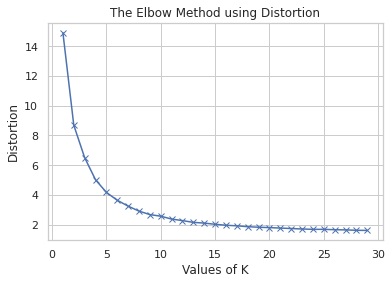

In [108]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### 4.1.2 Using Inertia

In [109]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

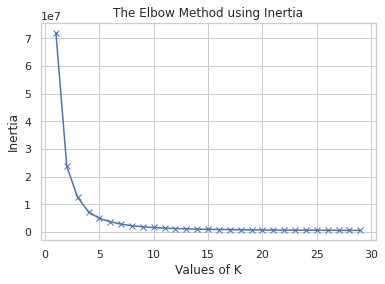

In [110]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [111]:
X = np.array(X)

#### Just to draw the clustering for visualization. I will take a subset from the data

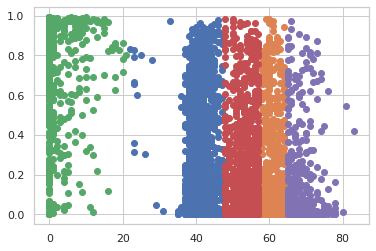

In [116]:

def kmeansClustering(n_clusters, X):
    model = KMeans(n_clusters=n_clusters)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = np.unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = np.where(yhat == cluster)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    plt.show()
kmeansClustering(5,X[:5000,])

# 5. Training the Model with Pre-processed DataSet

In [117]:
Y_label

array([14, 14, 14, ..., 23, 23, 23])

In [118]:
df

popularity  acousticness  danceability  ...  5/4  loudness  duration_m
0                0       0.61100         0.389  ...    0  3.944084    0.166667
1                1       0.24600         0.590  ...    0  3.869074    0.166667
2                3       0.95200         0.663  ...    1  3.678273    0.333333
3                0       0.70300         0.240  ...    0  3.720354    0.333333
4                4       0.95000         0.331  ...    0  3.475284    0.000000
...            ...           ...           ...  ...  ...       ...         ...
232720          39       0.00384         0.687  ...    0  3.757262    0.666667
232721          38       0.03290         0.785  ...    0  3.839732    0.666667
232722          47       0.90100         0.517  ...    0  3.810544    0.333333
232723          44       0.26200         0.745  ...    0  3.835574    0.500000
232724          35       0.09730         0.758  ...    0  3.844793    0.666667

[218074 rows x 29 columns]

In [119]:
#Split for Training, Validation and Testing 
from sklearn.model_selection import train_test_split


In [120]:
 X_train, X_test, y_train, y_test = train_test_split(np.array(df),Y_label,test_size=0.2, random_state=42)

In [121]:
 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [122]:
print(X_train.shape)
print(y_train.shape)

(139567, 29)
(139567,)


In [123]:
print(X_test.shape)
print(y_test.shape)

(43615, 29)
(43615,)


In [124]:
print(X_val.shape)
print(y_val.shape)

(34892, 29)
(34892,)


### Now the data is ready for training. Since we are only doing EDA, we do not need to train the data on a ML model. Generally, the problem is a classification problem (multiclass). We can use neural network, logistic regression, SVM, Decision trees, and any other classifiers to solve the problem 

## Refrences: 
### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
### https://realpython.com/k-means-clustering-python/
### https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
### https://www.kaggle.com/adisrw/spotify-data-analysis-using-python/data
### https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
### https://towardsdatascience.com/statistics-in-python-using-chi-square-for-feature-selection-d44f467ca745
### https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
### https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
### https://t.co/rurMFoBmlY